In [1]:
import sounddevice as sd
from scipy.io.wavfile import write
import IPython.display as ipd

%matplotlib inline
import sklearn
import librosa
import matplotlib.pyplot as plt
import librosa.display

c:\users\99555\appdata\local\programs\python\python36\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
def recorder(outfile):
    fs = 44100  # Sample rate
    seconds = 3  # Duration of recording

    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
    sd.wait()  # Wait until recording is finished
    write(outfile, fs, myrecording)  # Save as WAV file     

In [3]:
ipd.Audio('anchor.wav')

In [25]:
x_pos , sr_pos = librosa.load('Voices/positive.wav')
x_neg , sr_neg = librosa.load('Voices/negative.wav')
x_anc , sr_anc = librosa.load('Voices/levioza-origin.wav')

In [26]:
def waveplot(x, sr):
    plt.figure(figsize=(20, 5))
    librosa.display.waveplot(x, sr=sr)

In [27]:
def specto_plot(x, sr, y_axis='hz'):
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis=y_axis)
    plt.colorbar()

In [31]:
def to_mfcc(x, sr):
    return librosa.feature.mfcc(x, sr=sr)

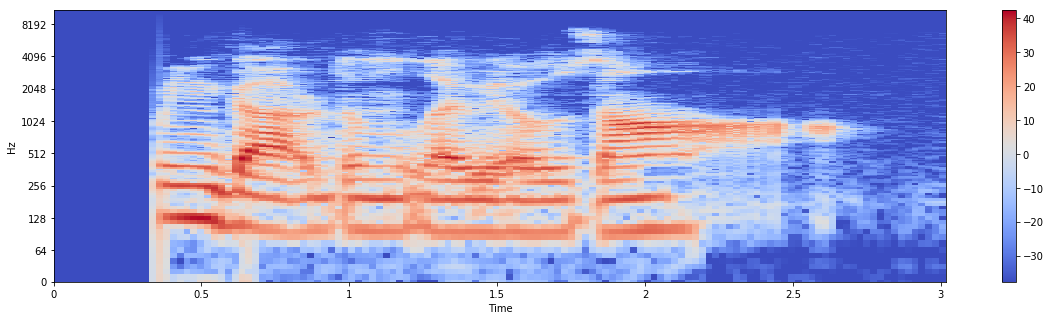

In [28]:
specto_plot(x_pos, sr_pos, 'log')

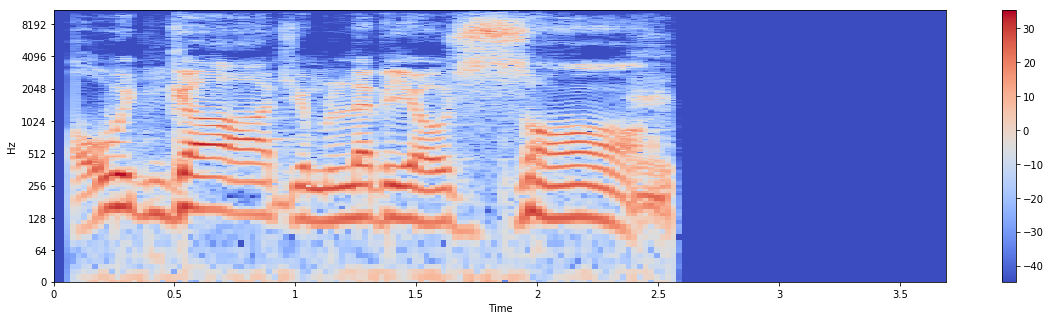

In [29]:
specto_plot(x_anc, sr_anc, 'log')

In [32]:
mfcc_anc = to_mfcc(x_anc, sr_anc)
mfcc_pos = to_mfcc(x_pos, sr_pos)
mfcc_neg = to_mfcc(x_neg, sr_neg)

In [41]:
xsim_pos = librosa.segment.cross_similarity(mfcc_anc, mfcc_pos, metric='cosine')
xsim_neg = librosa.segment.cross_similarity(mfcc_anc, mfcc_neg, metric='cosine')

In [35]:
print(xsim)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [False False  True ... False False False]
 [ True  True  True ...  True  True  True]]


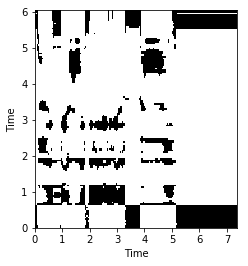

In [43]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
librosa.display.specshow(xsim_pos, x_axis='time', y_axis='time', hop_length=1024)

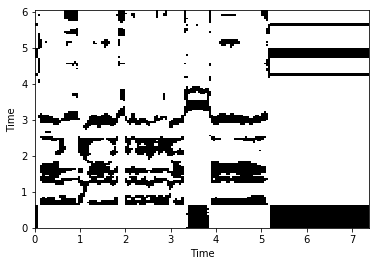

In [42]:
librosa.display.specshow(xsim_neg, x_axis='time', y_axis='time', hop_length=1024)